# Part I: Research Question

## A1: Question 
Based on available features within the dataset, can the organization predict what type of contract a new customer will sign up for and identify the features that influences the likelihood of a customer signing up for a one or two year contract?

## A2:  Data Analysis Goal
The goal of the data analysis is to classify each observation (customer) into one category of the “Contract” variable by using only the other variables in the observation. By conducting this classification process, the organization can then create a model that predicts what contract a new customer may sign up for. If a good model is created, variables can be evaluated and used to target potential customers who have qualities that make them more likely to sign up for long term contracts and adjust the organization’s policies and procedures to meet those customers’ expectations.

# Part II: Method Justification

## B1: Prediction Method
The method that will be used to conduct classification is a tree model, or more specifically, the random forest model. A descendant of Classification and Regression Trees(CART), a random forest is a relatively simple supervised algorithm that can be used to solve both regression and classification problems. Random forest models create multiple decision trees from random subsets of the data. These subset are created through the process of bagging (short for bootstrap aggregating). The prediction from each decision tree is then averaged to find a set of predictor variables that produce the best classification model. Because the model automatically comes up with the best model, hyper-tuning usually has little effect on the outcome of the model.

## B2: Summary of One Assumption
The random forest model only has one assupmtion and it is the one assumption that applies to all other models. This is the assumption that the sample data it relies upon is representative of the population. Care needs to be taken when creating a sample to ensure the sample data is representative of the population. If needed, stratified sampling should be conducted to ensure that subgroups of the population are included in the sample data proportionally.

## B3: Python Packages and Justifications
- pandas: This package is used to perform various data manipulation tasks to import, clean, and manipulate data to conduct data analysis.

- NumPy: NumPy is used to conduct the various mathematical operations in the data analysis.

- matplotlib: matplotlib is an extension of NumPy and is a plotting package used to conduct graphical representations of features in the data set 

- seaborn: built as an extension of matplotlib, seaborn allows users to create data visualizations graphics of features to assist with data analysis

- sklearn: sklearn is a package that contains many tools to model and evaluate models built for data analysis

# Part III: Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

%matplotlib inline

In [2]:
#Load the dataset
churn_clean = pd.read_csv("C:/Users/holtb/Data/WGU Datasets/churn_clean.csv")

#Drop unused variables
churn_model_data = churn_clean.drop(['CaseOrder','Customer_id','Interaction','UID','Lat','Lng', 'Zip'], axis=1)

## C1: Data Preprocessing Goal
An advantage of using random forest is that minimal data preprocessing needs to be conducted on the data set. Random forests are robust to outliers and unscaled data. Although not required for random forest classification, one goal of data preprocessing for this task is too ensure there is no missing data. This is conducted by searching for null values or any other characters within the dataset that represent a missing value and impute appropriate values.  

## C2: Initial Data Set Variables

<b>Independent Variables</b>
- Population              (Continuous)

- Area                    (Categorical)

- TimeZone                (Categorical)

- Job                     (Categorical)

- Children                (Continuous)

- Age                     (Continuous)

- Income                  (Continuous)

- Marital                 (Categorical)

- Gender                  (Categorical)

- City                    (Categorical)

- State                   (Categorical)

- Outage_sec_perweek      (Continuous)

- Email                   (Continuous)

- Contacts                (Continuous)

- Yearly_equip_failure    (Continuous)

- Techie                  (Categorical)

- Tenure                  (Continuous)

- Churn                   (Categorical)

- Port_modem              (Categorical)

- Tablet                  (Categorical)

- InternetService         (Categorical)

- Phone                   (Categorical)

- Multiple                (Categorical)

- OnlineSecurity          (Categorical)

- OnlineBackup            (Categorical)

- DeviceProtection        (Categorical)

- TechSupport             (Categorical)

- StreamingTV             (Categorical)

- StreamingMovies         (Categorical)

- PaperlessBilling        (Categorical)

- PaymentMethod           (Categorical)

- Tenure                  (Categorical)

- MonthlyCharge           (Continuous)

- Bandwidth_GB_Year       (Continuous)

- Item1                   (Categorical)

- Item2                   (Categorical)

- Item3                   (Categorical)

- Item4                   (Categorical)

- Item5                   (Categorical)

- Item6                   (Categorical)

- Item7                   (Categorical)

- Item8                   (Categorical)

<b>Classification Variable</b>

- Contract                   (Categorical)

## C3: Data Preparation Steps

### Step 1: Import Data
The first step is to upload the data set into the data analysis program to be used. In this case, the data set "churn_clean" has already been imported as shown above. While our data set was already in .csv format, it may be necessary to transform the data set depending on the format and program being used. 


### Step 2: Initial Data Exploration
The second step of data preparation is to conduct initial data exploration. During this step, the information of the data set and each variable is explored for data types, dataset size, number of variables, null values, odd data, etc. By conducting an initial exploration of the data set, specific variables can be examined for usefulness. For example, the first four columns can be dropped from our initial dataset as they are administrative features used to identify customers. 

Additionally, visual data analysis is conducted to get an understanding of patterns and relationships within the dataset. Having an understanding of how the data is distributed and how the variables are related can help when creating the model. For example, comparing the categorical variable of "Contract" with other continuous variables gives us an idea of how features are distributed within each category. Other variables that have been identified to be dropped are 'County', 'Lat', and 'Lng'. These variables are not very useful as they describe the same things as other variables. For example, the 'City' variable describes the same feature as "lat" and "lng". Additionally, we can check for data imbalance by checking the totals for each of the "Contract" values in the dataset.  

In [3]:
# Retriving basic information of the data set
churn_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
#Drop unused variables
churn_dropped_data = churn_clean.drop(['CaseOrder','Customer_id','Interaction','UID','Lat','Lng', 'Zip'], axis=1)

In [5]:
#Checking data values in numerical variables
churn_dropped_data.describe().round(2)

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,9756.56,2.09,53.08,39806.93,10.00,12.02,0.99,0.40,34.53,172.62,3392.34,3.49,3.51,3.49,3.50,3.49,3.50,3.51,3.50
std,14432.70,2.15,20.70,28199.92,2.98,3.03,0.99,0.64,26.44,42.94,2185.29,1.04,1.03,1.03,1.03,1.02,1.03,1.03,1.03
min,0.00,0.00,18.00,348.67,0.10,1.00,0.00,0.00,1.00,79.98,155.51,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,738.00,0.00,35.00,19224.72,8.02,10.00,0.00,0.00,7.92,139.98,1236.47,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
50%,2910.50,1.00,53.00,33170.60,10.02,12.00,1.00,0.00,35.43,167.48,3279.54,3.00,4.00,3.00,3.00,3.00,3.00,4.00,3.00
75%,13168.00,3.00,71.00,53246.17,11.97,14.00,2.00,1.00,61.48,200.73,5586.14,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
max,111850.00,10.00,89.00,258900.70,21.21,23.00,7.00,6.00,72.00,290.16,7158.98,7.00,7.00,8.00,7.00,7.00,8.00,7.00,8.00


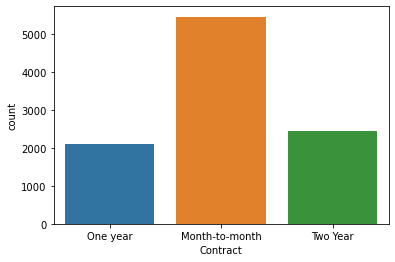

In [7]:
#counts of Contract
sns.countplot(x="Contract",
            data = churn_clean)

plt.show()

In [8]:
churn_clean['Contract'].value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

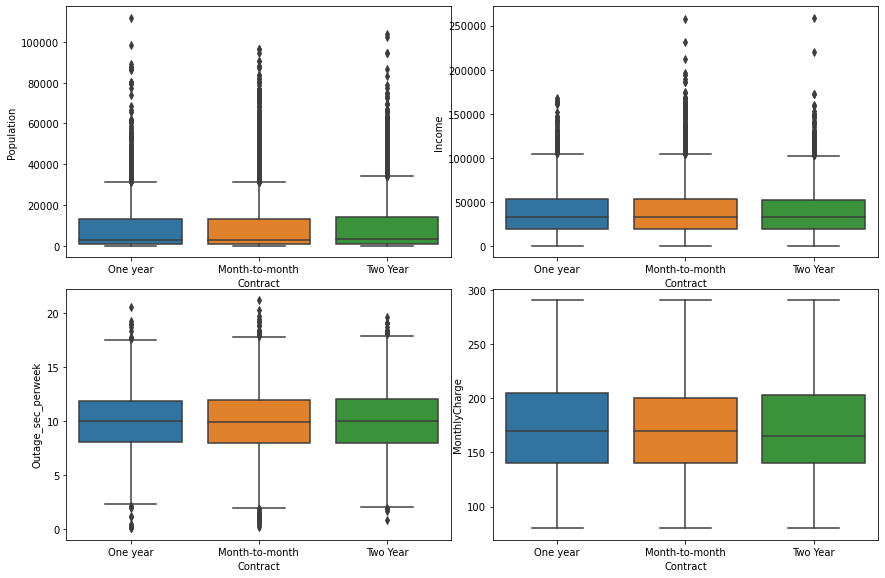

In [9]:
#Creating boxplots 
fig, axs = plt.subplots(2,2, figsize=(12,8))
plt.tight_layout()

sns.boxplot(x="Contract",
            y="Population",
            data = churn_clean,
            ax = axs[0,0])
sns.boxplot(x="Contract",
            y="Income",
            data = churn_clean,
            ax = axs[0,1])

sns.boxplot(x="Contract",
            y="Outage_sec_perweek",
            data = churn_clean,
            ax = axs[1,0])

sns.boxplot(x="Contract",
            y="MonthlyCharge",
            data = churn_clean,
            ax = axs[1,1]);

### Step 3: Evaluate Dataset for Missing Data
In this step of data preprocessing, the variables in the data set are examined for missing data. Missing data is usually identified as "NULL" values but could also be respresented by different values such as "0" or "?" as other examples. As shown below, there are 97 rows in our dataset with population values of "0". There are multiple ways that the missing data could be imputed. One method would be to impute the mean value of population in the observations with missing values. Another more time consuming option would be to manually impute the actual population values based off recent census data. The method of missing data imputation varies based on the significance of the variable and the accuracy needed based effects of data imputation. In this case, the quickest and most effective method would be to drop the observations from the data set altogether. Since we have 10000 observation within our dataset, losing 97 would not significantly impact our model results. 

In [10]:
display(churn_dropped_data.isnull().any())

City                    False
State                   False
County                  False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProtection        False
TechSupport             False
StreamingTV             False
StreamingMovies         False
PaperlessBilling        False
PaymentMethod           False
Tenure                  False
MonthlyCha

In [11]:
pop_zero = churn_dropped_data[churn_dropped_data['Population'] == 0]
pop_zero

,City,State,County,Population,Area,TimeZone,Job,Children,Age,Income,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
13,East Livermore,ME,Androscoggin,0,Urban,America/New_York,Learning disability nurse,5,29,115114.57,...,184.971516,1948.694497,5,6,5,2,4,5,4,4
422,Warren,MI,Macomb,0,Urban,America/Detroit,"Surveyor, quantity",2,51,14817.22,...,200.132293,1537.296207,4,5,5,3,4,4,4,2
428,Bayside,NY,Queens,0,Suburban,America/New_York,Ceramics designer,8,25,43586.80,...,152.479779,2192.693797,3,3,3,4,4,6,4,3
434,Memphis,TN,Shelby,0,Urban,America/Chicago,Advice worker,1,23,48852.54,...,192.470522,801.470960,4,4,4,3,3,5,4,4
446,Caroleen,NC,Rutherford,0,Urban,America/New_York,Fisheries officer,1,56,65900.37,...,240.114868,1886.312286,4,4,4,5,5,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9216,Memphis,TN,Shelby,0,Suburban,America/Chicago,"Horticulturist, commercial",1,63,85694.68,...,162.497000,5088.812303,4,4,2,5,4,3,4,3
9441,New York,NY,New York,0,Suburban,America/New_York,Media planner,1,60,25429.84,...,162.511900,5341.089808,4,4,3,4,2,4,3,4
9657,Oak Island,MN,Lake of the Woods,0,Rural,America/Chicago,"Accountant, chartered",0,35,71970.60,...,197.470200,6064.836260,4,5,4,3,4,4,3,2
9702,Vidalia,GA,Toombs,0,Suburban,America/New_York,"Accountant, chartered",0,34,36171.94,...,137.468400,5914.162068,3,3,2,5,2,3,3,4


In [12]:
#Drop observations with condition of population equaling 0
churn_dropped_data.drop(churn_dropped_data[churn_dropped_data['Population'] == 0].index, inplace = True)

In [13]:
churn_dropped_data

,City,State,County,Population,Area,TimeZone,Job,Children,Age,Income,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,Point Baker,AK,Prince of Wales-Hyder,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,West Branch,MI,Ogemaw,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,Yamhill,OR,Yamhill,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,Del Mar,CA,San Diego,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,Needville,TX,Fort Bend,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Mount Holly,VT,Rutland,640,Rural,America/New_York,Sport and exercise psychologist,3,23,55723.74,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,Clarksville,TN,Montgomery,77168,Rural,America/Chicago,Consulting civil engineer,4,48,34129.34,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,Mobeetie,TX,Wheeler,406,Rural,America/Chicago,IT technical support officer,1,48,45983.43,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,Carrollton,GA,Carroll,35575,Urban,America/New_York,Water engineer,1,39,16667.58,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


### Step 4: Factoring Numberical Variables and Encoding Categorical Variables


In [14]:
#Converting Item variables to categorical variables
churn_dropped_data[['Item1','Item2','Item3',
                  'Item4','Item5','Item6',
                  'Item7','Item8']] = churn_dropped_data[['Item1','Item2','Item3',
                                                        'Item4','Item5','Item6',
                                                        'Item7','Item8']].astype('category')

In [15]:
churn_dt_data = churn_dropped_data.drop(['Contract'], axis = 1)

In [16]:
churn_dt_data.columns

Index(['City', 'State', 'County', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Port_modem', 'Tablet', 'InternetService', 'Phone',
       'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [17]:
churn_dt_data = pd.get_dummies(churn_dt_data)

## C4: Copy of Prepared Dataset

In [18]:
churn_dt_data.to_csv('C:/Users/holtb/Data/D209 Data Mining I/Task_2/churn_dt_data.csv')

# Part IV: Analysis
The random forest technique is explained through the process below. The analysis meets the requirements of splitting the data into training and test data and is saved as .csv files. The first step of the analysis is to separate the classification variable from the matrix dataset.

In [19]:
#Create X and y matrix for splitting and modeling
X = churn_dt_data
y = churn_dropped_data['Contract']

Next, the data is split into training and testing data. For this, the train_test_split function was used to split the data into 70% training and 30% testing data. 

In [20]:
#split the data set into train(70%) and test(30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
#Data splits are saved to .csv files
X_train.to_csv('C:/Users/holtb/Data/D209 Data Mining I/Task_2/X_train.csv')
X_test.to_csv('C:/Users/holtb/Data/D209 Data Mining I/Task_2/X_test.csv')
y_train.to_csv('C:/Users/holtb/Data/D209 Data Mining I/Task_2/y_train.csv')
y_test.to_csv('C:/Users/holtb/Data/D209 Data Mining I/Task_2/y_test.csv')

In [22]:
#Setting SEED number for model evaluations for random_state
SEED = 26

After the training and testing data is created, the random forest modeling package, RandomForestClassifier, is instantiated into a object. The training data is then fit to the classification model. 

In [23]:
#Random Forest Model
rf = RandomForestClassifier(random_state=SEED)

In [24]:
#Random Forest Fit
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=26)

Finally, the model is tested by using the split testing data. The accuracy score, classification report and confusion matrix were then created to evaluate the model. 

In [25]:
#Random Forest Predict
y_pred_rf = rf.predict(X_test) 

In [26]:
#Random Forest accuracy
accuracy_score(y_test, y_pred_rf)

0.5419050824638169

In [27]:
#Random Forest classification report
print(classification_report(y_pred_rf, y_test))

                precision    recall  f1-score   support

Month-to-month       0.99      0.54      0.70      2932
      One year       0.00      1.00      0.01         3
      Two Year       0.02      0.39      0.04        36

      accuracy                           0.54      2971
     macro avg       0.34      0.64      0.25      2971
  weighted avg       0.98      0.54      0.69      2971



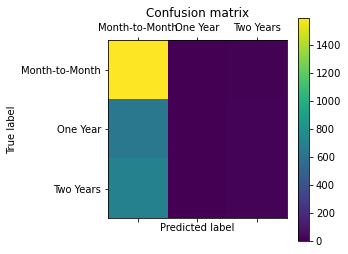

In [28]:
#Create confusion matrix for second model
plt.matshow(confusion_matrix(y_test, y_pred_rf))
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0,1,2],["Month-to-Month","One Year","Two Years"])
plt.yticks([0,1,2],["Month-to-Month","One Year","Two Years"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In addition to using the above outputs to evaluate the model, the feature importance was extracted from the model to evaluate which features have the most impact on the model. The features are expressed as weight of the particular feature expressed in percentage. (Giussani, 2020)

In [29]:
rf.feature_importances_.shape

(8470,)

In [30]:
#Create matrix of feature importance and sort
importances = pd.Series(data=rf.feature_importances_,
                        index=X_train.columns)

importances_sorted=importances.sort_values()

In [31]:
#Choose top important features
top_importance = importances_sorted[8450:,]

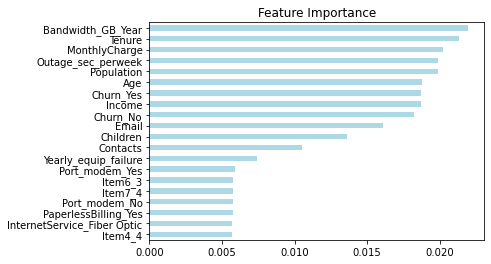

In [32]:
#Plot most important features
top_importance.plot(kind='barh', color='lightblue')
plt.title('Feature Importance')
plt.show()

The process was conducted again to run a random forest classification model, but this time multiple parameters were specified and cross validation ran with the different sets of parameters to attempt to hyper tune the model. However, as expected, there was no change to the output of the model.

In [33]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 26,
 'verbose': 0,
 'warm_start': False}

In [34]:
#Define a grid of hyperparameter 'params_rf'
params_rf ={
            'n_estimators':[50,100,150,200],
            'max_depth':[2,4,6],
            'min_samples_leaf':[0.1,0.2],
            'max_features':[0.4,0.6,0.8]
            }

In [35]:
#Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       cv=3,
                       scoring='accuracy',
                       verbose=1,
                       n_jobs=-1)

In [36]:
#Fit the model with CV & params_grid
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=26), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6],
                         'max_features': [0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [37]:
#Extract best parameters
grid_rf.best_params_

{'max_depth': 4,
 'max_features': 0.8,
 'min_samples_leaf': 0.1,
 'n_estimators': 150}

In [38]:
#Extract best model
best_model_rf=grid_rf.best_estimator_

In [39]:
#Predict values using best model
y_pred_rf_best = best_model_rf.predict(X_test)

In [40]:
#Accuracy score of best model
accuracy_score(y_test, y_pred_rf_best)

0.5392123864018848

In [41]:
print(classification_report(y_pred_rf, y_test))

                precision    recall  f1-score   support

Month-to-month       0.99      0.54      0.70      2932
      One year       0.00      1.00      0.01         3
      Two Year       0.02      0.39      0.04        36

      accuracy                           0.54      2971
     macro avg       0.34      0.64      0.25      2971
  weighted avg       0.98      0.54      0.69      2971



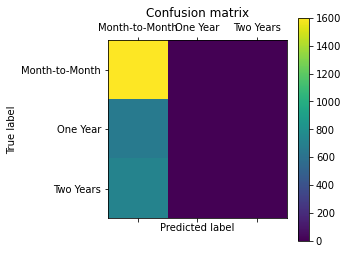

In [42]:
#Create confusion matrix for second model
plt.matshow(confusion_matrix(y_test, y_pred_rf_best))
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0,1,2],["Month-to-Month","One Year","Two Years"])
plt.yticks([0,1,2],["Month-to-Month","One Year","Two Years"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [43]:
#Create matrix of feature importance and sort
importances = pd.Series(data=best_model_rf.feature_importances_,
                        index=X_train.columns)

importances_sorted_best=importances.sort_values()

In [44]:
#Choose top important features
top_importance_best = importances_sorted[8450:,]
least_importance = importances_sorted[0:100,]

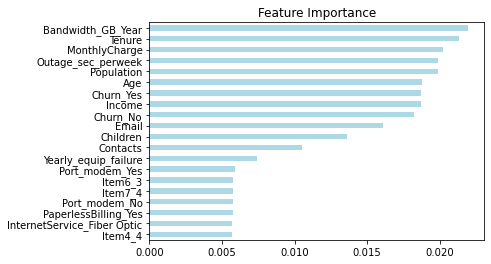

In [45]:
#Plot most important features
top_importance_best.plot(kind='barh', color='lightblue')
plt.title('Feature Importance')
plt.show()

# Part V: Data Summary and Implications

## Accuracy
Nn both cases the model was only able to predict the correct results of the test set with an accuracy of 54%. With a random chance of selecting the correct result equal to 1/3, or 33%, a 54% accuracy of the model is not great. Because this is a classification model, the mean squared error (MSE), is not calculated as a predition value would be 1 or 0's. MSE calculations would not be useful in a classification model and are used for regression models predicting continous values. (Bruce, 2020)

## Results and Implications
As the analysis portion shows, two separate random forest models were created: one without using cross-validation on the training data and one using cross-validation with multiple parameters. Evaluation shows there was no difference between the models as random forest models without hyper-tuning usually are produced with the best parameters. In fact, the model seems to predict that most outcomes will be month-to-month contracts leading to extremely high precision in the class but high false positives and very few correct predictions for the One Year and Two Year classes. A potential issue of having an imbalanced dataset was considered and the proportion of each class in the data set was calculated:  

Month-to-month = 55%

One year = 24%

Two Year = 21%


While month-to-month has a significant proportion over the other two classes the ratio is approximately 2:1 for both and there enough observations for all classes to make an accurate model. Overall, this random forest model ended up to be quite poor to be of use to answer the research question. 


## Limitations
One limitation of the analysis is the inability to control what the model does. As seen above, even adjusting the parameters had little effect on the outcome of the model. While the analysis was simple and straight forward, the simplicity creates a rigid and inflexible model. The outcome led to a model that would incidently predict one class the majority of iterations.
 

## Course of Action
Because the model ended up performing poorly, it is suggested that features be removed from the model to create a simpler model or create another model altogether. The model could be recreated using the most important factors found in the initial random forest model above. This will lead to a random forest model with less features and therefore less information; but perhaps a model that can be useful in answering the research question can also be created. 


# Part VI: Demonstration

## F. Video

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=6695d92a-7e06-4982-910f-ad9601356c15

## G. Code Sources

Bowne-Anderson, H. (n.d.). Supervised Learning with scikit-learn. Retrieved August 15, 2021, from https://learn.datacamp.com/courses/supervised-learning-with-scikit-learn

Bruce, P., Bruce, A. G., & Gedeck, P. (2020). Practical statistics for data scientists: 50 essential concepts using R and Python. Sebastopol: OReilly.

Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020). DOI: 0.1038/s41586-020-2649-2. (Publisher link).

J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

Python Software Foundation. Python Language Reference, version 3.7. Available at http://www.python.org

W. McKinney, AQR Capital Management, pandas: a python data analysis library, http://pandas.sourceforge.net

## H. References

Andrea Giussani. (2020). Applied Machine Learning with Python. EGEA Spa - Bocconi University Press.

Bruce, P., Bruce, A. G., & Gedeck, P. (2020). Practical statistics for data scientists: 50 essential concepts using R and Python. Sebastopol: OReilly.